In [1]:
import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sim = sc.read('sim_data.h5ad')
sim

AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'Cell', 'Batch', 'Group', 'ExpLibSize', 'sizeFactor'
    var: 'Gene', 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'DEFacGroup5', 'DEFacGroup6'

In [3]:
sim.obs['Group'] = sim.obs['Group'].astype('category')

sim.obs['y'] = sim.obs['Group'].cat.codes

sim.obs['label'] = sim.obs['y'].astype('category')

In [4]:
sim.var_names

Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7', 'Gene8',
       'Gene9', 'Gene10',
       ...
       'Gene991', 'Gene992', 'Gene993', 'Gene994', 'Gene995', 'Gene996',
       'Gene997', 'Gene998', 'Gene999', 'Gene1000'],
      dtype='object', length=1000)

In [5]:
# import random
# import math
# random.seed(11)
# def generate_unique_coordinates(num_points,r_min,r_max):
#     coordinates = set()

#     while len(coordinates) < num_points:
#         # 生成随机角度
#         theta = random.uniform(0, math.pi / 2)
#         # 生成随机半径
#         r = random.uniform(r_min, r_max)
#         # 计算坐标
#         x = int(r * math.cos(theta))
#         y = int(r * math.sin(theta))
#         if np.sqrt(x**2 + y**2)>=r_min and np.sqrt(x**2 + y**2)<r_max:
#         # 将坐标添加到集合中，确保不重复
#             coordinates.add((x, y))
#     print(1)
#     return np.array(list(coordinates))

# # 生成不重复的坐标
# coordinates1 = generate_unique_coordinates(sim[sim.obs['Group'] == 'Group1', :].shape[0], 0, 17)
# coordinates2=  generate_unique_coordinates(sim[sim.obs['Group'] == 'Group2', :].shape[0], 17, 24)
# coordinates3=  generate_unique_coordinates(sim[sim.obs['Group'] == 'Group3', :].shape[0], 24, 27)
# coordinates4=  generate_unique_coordinates(sim[sim.obs['Group'] == 'Group4', :].shape[0], 27, 32)
# coordinates5=  generate_unique_coordinates(sim[sim.obs['Group'] == 'Group5', :].shape[0], 32, 36)
# coordinates6=  generate_unique_coordinates(sim[sim.obs['Group'] == 'Group6', :].shape[0], 36, 39)


In [6]:
import random
import math
random.seed(1)

def generate_unique_coordinates_1(num_points,intercept_min,intercept_max):
    coordinates = set()

    while len(coordinates) < num_points:
        x = int(random.uniform(0, intercept_max))
        y = int(random.uniform(0, intercept_max))

        if x+y>=intercept_min and x+y<intercept_max:
        # 将坐标添加到集合中，确保不重复
            coordinates.add((x, y))
    print(1)
    return np.array(list(coordinates))



coordinates1 = generate_unique_coordinates_1(sim[sim.obs['Group'] == 'Group1', :].shape[0], 0, 21)
coordinates2 = generate_unique_coordinates_1(sim[sim.obs['Group'] == 'Group2', :].shape[0], 21, 30)
coordinates3 = generate_unique_coordinates_1(sim[sim.obs['Group'] == 'Group3', :].shape[0], 30, 33)
coordinates4 = generate_unique_coordinates_1(sim[sim.obs['Group'] == 'Group4', :].shape[0], 33, 40)
coordinates5 = generate_unique_coordinates_1(sim[sim.obs['Group'] == 'Group5', :].shape[0], 40, 44)
coordinates6 = generate_unique_coordinates_1(sim[sim.obs['Group'] == 'Group6', :].shape[0], 44, 48)

1
1
1
1
1
1


In [7]:
sim.obsm['spatial'] = np.zeros((sim.n_obs, 2))

In [8]:
sim.obsm['spatial'][sim.obs['Group'] == 'Group1', :] = coordinates1
sim.obsm['spatial'][sim.obs['Group'] == 'Group2', :] = coordinates2
sim.obsm['spatial'][sim.obs['Group'] == 'Group3', :] = coordinates3
sim.obsm['spatial'][sim.obs['Group'] == 'Group4', :] = coordinates4
sim.obsm['spatial'][sim.obs['Group'] == 'Group5', :] = coordinates5
sim.obsm['spatial'][sim.obs['Group'] == 'Group6', :] = coordinates6

In [9]:
sim.obsm['spatial']

array([[ 9., 26.],
       [ 7.,  3.],
       [14., 17.],
       ...,
       [ 5.,  2.],
       [10.,  2.],
       [28.,  0.]])

In [10]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder


# # 创建OneHotEncoder对象
# encoder = OneHotEncoder(categories=[['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6']], sparse_output=False)

# # 将Group列转换为one-hot编码
# one_hot = encoder.fit_transform(sim.obs['Group'].values.reshape(-1, 1))

# sim.obsm['Group_onehot']=one_hot

In [11]:
from scipy.spatial import distance_matrix

spatial_coords = sim.obsm['spatial']

# 计算距离矩阵
dist_matrix = distance_matrix(spatial_coords, spatial_coords)

# 设定距离阈值
distance_threshold = 1  # 根据数据集和需要调整此值

# 构建邻接矩阵
adjacency_matrix = (dist_matrix <= distance_threshold).astype(int)

# 将对角线元素设为0（不包括自己）
np.fill_diagonal(adjacency_matrix, 0)



In [12]:
adjacency_matrix.nonzero()

(array([  0,   0,   0, ..., 999, 999, 999]),
 array([287, 478, 668, ..., 319, 460, 525]))

In [13]:
sim.obsp['adjacency_matrix']=adjacency_matrix


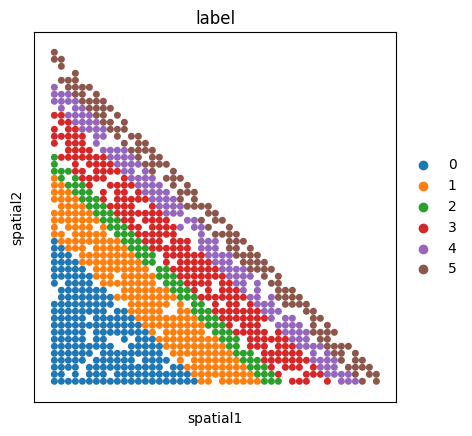

In [14]:
adata_st1 = sim.copy()
# 将y坐标取反一次
adata_st1.obsm['spatial'][:, 1] = -adata_st1.obsm['spatial'][:, 1]

sc.pl.spatial(adata_st1, spot_size=1 ,color='label')

In [15]:
sim[np.all(sim.obsm['spatial']==np.array([11,6]), axis=1)].obs

,Cell,Batch,Group,ExpLibSize,sizeFactor,y,label


In [16]:
sim.obs

,Cell,Batch,Group,ExpLibSize,sizeFactor,y,label
Cell1,Cell1,Batch1,Group4,64763.245660,1.064776,3,3
Cell2,Cell2,Batch1,Group1,59122.282314,0.963867,0,0
Cell3,Cell3,Batch1,Group3,50145.665841,0.797908,2,2
Cell4,Cell4,Batch1,Group1,62585.354417,1.008334,0,0
Cell5,Cell5,Batch1,Group1,65424.974461,1.053324,0,0
...,...,...,...,...,...,...,...
Cell996,Cell996,Batch1,Group1,52688.531414,0.875178,0,0
Cell997,Cell997,Batch1,Group1,83311.430689,1.378397,0,0
Cell998,Cell998,Batch1,Group1,64057.922592,1.054320,0,0
Cell999,Cell999,Batch1,Group1,48614.788963,0.795229,0,0


In [17]:
sc.pp.log1p(sim)

In [18]:
sim.X.shape

(1000, 1000)

In [19]:
# sim.X = np.maximum(sim.X + np.random.normal(0,0.01,sim.X.shape),0)

In [20]:
sim.write_h5ad('sim_st_2.h5ad')

In [21]:
df = sim.obs
df.reset_index(drop=True, inplace=True)
df

,Cell,Batch,Group,ExpLibSize,sizeFactor,y,label
0,Cell1,Batch1,Group4,64763.245660,1.064776,3,3
1,Cell2,Batch1,Group1,59122.282314,0.963867,0,0
2,Cell3,Batch1,Group3,50145.665841,0.797908,2,2
3,Cell4,Batch1,Group1,62585.354417,1.008334,0,0
4,Cell5,Batch1,Group1,65424.974461,1.053324,0,0
...,...,...,...,...,...,...,...
995,Cell996,Batch1,Group1,52688.531414,0.875178,0,0
996,Cell997,Batch1,Group1,83311.430689,1.378397,0,0
997,Cell998,Batch1,Group1,64057.922592,1.054320,0,0
998,Cell999,Batch1,Group1,48614.788963,0.795229,0,0


In [22]:
group1 = df[df['Group']=="Group1"].index.tolist()
group2 = df[df['Group']=="Group2"].index.tolist()
group3 = df[df['Group']=="Group3"].index.tolist()
group4 = df[df['Group']=="Group4"].index.tolist()
group5 = df[df['Group']=="Group5"].index.tolist()
group6 = df[df['Group']=="Group6"].index.tolist()

In [23]:
import scanpy as sc
from types import SimpleNamespace
from src.data import split_function
import torch
import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


data_path = "data/sim2.pth"

train_ratio=0.8

adata_st = sc.read('sim_st_2.h5ad')

data = SimpleNamespace()
data.x=torch.tensor(adata_st.X)
# data.y=torch.tensor(adata_st.obsm['proportion'])
data.y = torch.tensor(adata_st.obs['y'].values)

# data.y=data.y.to(dtype=torch.float32)
data.y=data.y.type(torch.LongTensor)

data.x = data.x.type(torch.FloatTensor)

data.edge_index = torch.tensor(adata_st.obsp['adjacency_matrix'].nonzero())
data.edge_index = data.edge_index.to(dtype=torch.int64)

data.num_classes=6
data.num_features=1000
data.num_nodes=1000
data.name='sim2'
data.genes=adata_st
data.group1=group1
data.group2=group2
data.group3=group3
data.group4=group4
data.group5=group5
data.group6=group6

data.train_mask, data.val_mask, data.test_mask = split_function(
    data.y.numpy(), train_ratio)

torch.save(data, data_path)

/home/zhaoyubiao/miniconda3/envs/graph/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
